In [41]:
# Importing libraries
import pandas as pd

In [42]:
# 전처리 불량량 Loading
Defect_df = pd.read_excel('preprocessed_output_data4.xlsx')
# 전처리 투입량 Loading
Input_df = pd.read_excel('preprocessed_input_data4.xlsx')
# 전처리 스크랩 Loading
Scrap_df = pd.read_excel('preprocessed_scrap_data4.xlsx')


In [43]:
Input_df.head()

,Roll_분기,Roll_Yr_Mth,Roll_Mth,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,...,주조완료일,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분,압연일
0,1Q,2023-1,1,2023,1,202301,S52719,B310163302,9Y01,압연,...,2023-01-02,1,A,A,8301,2023-01-03,2023-02-01,N,C,21
1,1Q,2023-1,1,2023,1,202301,S52719,B310163301,9Y01,압연,...,2023-01-02,1,A,A,8301,2023-01-03,2023-02-01,N,C,21
2,1Q,2023-1,1,2023,1,202301,S52718,B310137001,9Y01,압연,...,2023-01-02,1,A,A,8301,2023-01-04,2023-02-01,N,C,21
3,1Q,2023-1,1,2023,1,202301,S52719,B310315800,9Y01,압연,...,2023-01-02,1,A,A,8301,2023-01-03,2023-02-01,N,C,21
4,1Q,2023-1,1,2023,1,202301,S52718,B310137501,9Y01,압연,...,2023-01-02,1,A,A,8301,2023-01-04,2023-02-01,N,C,24


In [44]:
# Convert 'Roll_Yr_Mth' column to datetime type
Input_df['Roll_Yr_Mth'] = pd.to_datetime(Input_df['Roll_Yr_Mth'])

# Convert string column to year-month format
def convert_to_year_month(value):
    if isinstance(value, int):
        year = str(value)[:4]
        month = str(value)[4:]
        return f'{year}-{month.zfill(2)}'
    elif isinstance(value, str):
        year = value[:4]
        month = value[4:]
        return f'{year}-{month.zfill(2)}'
    else:
        return value

Input_df['년월'] = Input_df['년월'].apply(convert_to_year_month)

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Input_df['압연년월'] = Input_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

Input_df.head()

,Roll_분기,Roll_Yr_Mth,Roll_Mth,압연년,압연월,년월,HEAT_NO,LOT_NO,공정코드,구분,...,주여구분,지시GR종류,생산GR종류,생산GR공정,제강검사완료일,작업일,강관소재여부,주설비구분,압연일,압연년월
0,1Q,2023-01-01,1,2023,1,2023-01,S52719,B310163302,9Y01,압연,...,1,A,A,8301,2023-01-03,2023-02-01,N,C,21,2023-01
1,1Q,2023-01-01,1,2023,1,2023-01,S52719,B310163301,9Y01,압연,...,1,A,A,8301,2023-01-03,2023-02-01,N,C,21,2023-01
2,1Q,2023-01-01,1,2023,1,2023-01,S52718,B310137001,9Y01,압연,...,1,A,A,8301,2023-01-04,2023-02-01,N,C,21,2023-01
3,1Q,2023-01-01,1,2023,1,2023-01,S52719,B310315800,9Y01,압연,...,1,A,A,8301,2023-01-03,2023-02-01,N,C,21,2023-01
4,1Q,2023-01-01,1,2023,1,2023-01,S52718,B310137501,9Y01,압연,...,1,A,A,8301,2023-01-04,2023-02-01,N,C,24,2023-01


In [45]:
Defect_df.head()

,Roll_분기,Roll_Yr_Mth,Roll_Mth,압연년,압연월,년월일,업무구분,공장구분,HEAT_NO,LOT_NO,...,압연외경4,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분,압연일
0,1Q,2023-1,1,2023,1,2023-01-27,2,9,S52724,B310258804,...,0,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26
1,1Q,2023-1,1,2023,1,2023-01-27,2,9,S52728,B310319201,...,0,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26
2,1Q,2023-1,1,2023,1,2023-01-27,2,9,S52728,B310319201,...,0,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26
3,1Q,2023-1,1,2023,1,2023-01-30,2,9,S51746,B2A0679502,...,0,0,8100,2023-01-27,A,2023-02-02,NaN,NaN,C,27
4,1Q,2023-1,1,2023,1,2023-01-28,2,9,S50687,B260717900,...,0,0,8100,2023-01-23,A,2023-02-02,NaN,NaN,C,23


In [46]:
# Convert 'Roll_Yr_Mth' column to datetime type
Defect_df['Roll_Yr_Mth'] = pd.to_datetime(Defect_df['Roll_Yr_Mth'])

# Extract year and month parts and reformat
def convert_to_year_month_date(date):
    year, month, _ = date.split('-')
    return f'{year}-{month}'

def convert_to_Rolling_year_month_date(date):
    year = date.year
    month = date.month
    return f'{year}-{month:02}' 

Defect_df['년월'] = Defect_df['년월일'].apply(convert_to_year_month_date)
Defect_df['압연년월'] = Defect_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 년월은 년월일 컬럼 앞에 배치
position = Defect_df.columns.get_loc('년월일')
Defect_df.insert(position, '년월', Defect_df.pop('년월'))

Defect_df.head()


,Roll_분기,Roll_Yr_Mth,Roll_Mth,압연년,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,...,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분,압연일,압연년월
0,1Q,2023-01-01,1,2023,1,2023-01,2023-01-27,2,9,S52724,...,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26,2023-01
1,1Q,2023-01-01,1,2023,1,2023-01,2023-01-27,2,9,S52728,...,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26,2023-01
2,1Q,2023-01-01,1,2023,1,2023-01,2023-01-27,2,9,S52728,...,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26,2023-01
3,1Q,2023-01-01,1,2023,1,2023-01,2023-01-30,2,9,S51746,...,0,8100,2023-01-27,A,2023-02-02,NaN,NaN,C,27,2023-01
4,1Q,2023-01-01,1,2023,1,2023-01,2023-01-28,2,9,S50687,...,0,8100,2023-01-23,A,2023-02-02,NaN,NaN,C,23,2023-01


In [47]:
# Convert 'Roll_Yr_Mth' column to datetime type for Scrap_df
Scrap_df['Roll_Yr_Mth'] = pd.to_datetime(Scrap_df['Roll_Yr_Mth'])

Scrap_df['년월'] = Scrap_df['년월일'].apply(convert_to_year_month_date)
Scrap_df['압연년월'] = Scrap_df['최종압연일자'].apply(convert_to_Rolling_year_month_date)

# 년월은 년월일 컬럼 앞에 배치
position = Scrap_df.columns.get_loc('년월일')
Scrap_df.insert(position, '년월', Scrap_df.pop('년월'))

#불량과 폐기의 컬럼명이 동일하여 컬럼명 변경
Scrap_df.rename(columns={'발생수량':'폐기수량'}, inplace=True)
Scrap_df.rename(columns={'발생중량':'폐기중량'}, inplace=True)

Scrap_df.head()

,Roll_분기,Roll_Yr_Mth,Roll_Mth,압연년,압연월,년월,년월일,업무구분,공장구분,HEAT_NO,...,압연폭4,최종압연공정,최종압연일자,제품압연작업조,생성일시,HCR,투입중량,주설비구분,압연일,압연년월
0,1Q,2023-01-01,1,2023,1,2023-01,2023-01-27,2,9,S52724,...,0,8100,2023-01-26,A,2023-02-02,NaN,NaN,C,26,2023-01
1,1Q,2023-01-01,1,2023,1,2023-01,2023-01-30,2,9,S51746,...,0,8100,2023-01-27,A,2023-02-02,NaN,NaN,C,27,2023-01
2,1Q,2023-01-01,1,2023,1,2023-01,2023-01-28,2,9,S52461,...,0,8100,2023-01-24,B,2023-02-02,NaN,NaN,C,24,2023-01
3,1Q,2023-01-01,1,2023,1,2023-01,2023-01-28,2,9,S52727,...,0,8100,2023-01-27,B,2023-02-02,NaN,NaN,C,27,2023-01
4,2Q,2023-05-01,5,2023,5,2023-06,2023-06-23,2,9,S54210,...,0,8100,2023-05-28,A,2023-07-04,NaN,NaN,C,28,2023-05


In [48]:
# 기간 설정
start_date = pd.to_datetime('2023-01')  # None for no filter,or # '2023-01'
end_date = pd.to_datetime('2023-11')    # None for no filter,or # '2023-08'

# 기간 설정의 범위 결정()
if start_date is None or end_date is None:
    min_date = min(Input_df['압연년월'].min(), Defect_df['압연년월'].min())
    max_date = max(Input_df['압연년월'].max(), Defect_df['압연년월'].max())
    if start_date is None:
        start_date = min_date
    if end_date is None:
        end_date = max_date

# Convert the 'Year Month' column in Input_df and Defect_df to datetime if it's not already
Input_df['압연년월'] = pd.to_datetime(Input_df['압연년월'])
Defect_df['압연년월'] = pd.to_datetime(Defect_df['압연년월'])
Scrap_df['압연년월'] = pd.to_datetime(Scrap_df['압연년월'])

# 기간 필터 적용
Input_df = Input_df[(Input_df['압연년월'] >= start_date) & (Input_df['압연년월'] <= end_date)]
Defect_df = Defect_df[(Defect_df['압연년월'] >= start_date) & (Defect_df['압연년월'] <= end_date)]
Scrap_df = Scrap_df[(Scrap_df['압연년월'] >= start_date) & (Scrap_df['압연년월'] <= end_date)]


# 여러 개의 필터 조건 설정
steel_grade_filters = ['316LDS1','316LDSB','STS304HCS5','STS304SX'] #'316LDS1','316LDSB','STS304HCS5','STS304SX'
out_dia_filters =[]
defects_filters =['SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'] #'SEAM','SEAM+터짐', 'SEAM+종크랙','터짐','종크랙'


# 필터링 조건 생성(1)- apply_filters
def apply_filters(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition 

# 필터링 조건 생성(2) - apply_filters_2
def apply_filters_2(dataframe):
    if steel_grade_filters:
        grade_condition = dataframe['사내강종명'].isin(steel_grade_filters)
    else:
        grade_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if out_dia_filters:
        dia_condition = dataframe['외경'].isin(out_dia_filters)
    else:
        dia_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정

    if defects_filters:
        defects_condition = dataframe['이상코드명'].isin(defects_filters)
    else:
        defects_condition = pd.Series(True, index=dataframe.index)  # 모든 행에 대해 True로 설정
    
    return grade_condition & dia_condition & defects_condition

# 필터링된 결과 출력(덮어쓰기 했음!)
Input_df = Input_df[apply_filters(Input_df)]
Defect_df = Defect_df[apply_filters_2(Defect_df)]
Scrap_df = Scrap_df[apply_filters_2(Scrap_df)]

# Group by year and month, sum the '투입중량' and '발생중량'
grouped_input = Input_df.groupby(Input_df['압연년월'].dt.to_period('M'))['투입중량'].sum().reset_index()
grouped_defect = Defect_df.groupby(Defect_df['압연년월'].dt.to_period('M'))['발생중량'].sum().reset_index()
grouped_scrap = Scrap_df.groupby(Scrap_df['압연년월'].dt.to_period('M'))['폐기중량'].sum().reset_index()

# Merge input and defect data on 'Roll_Yr_Mth'
merged_df = pd.merge(grouped_input, grouped_defect, on='압연년월', how='left')
merged_df = pd.merge(merged_df, grouped_scrap, on='압연년월', how='left')

# Fill missing defect values with 0
merged_df['발생중량'] = merged_df['발생중량'].fillna(0)
merged_df['폐기중량'] = merged_df['폐기중량'].fillna(0)

# Calculate defect rate
merged_df['불량율'] = (merged_df['발생중량'] / merged_df['투입중량']) * 100
merged_df['폐기율'] = (merged_df['폐기중량'] / merged_df['투입중량']) * 100

#merged_df.head()
# Create a new column '년-월' with formatted year and month
merged_df['압연년월'] = merged_df['압연년월'].dt.year.astype(str) + '-' + merged_df['압연년월'].dt.month.astype(str)

# Print the merged DataFrame with defect rate
# print(merged_df)

In [49]:
merged_df

,압연년월,투입중량,발생중량,폐기중량,불량율,폐기율
0,2023-1,827658,24891,3319.0,3.007402,0.401011
1,2023-2,1268930,46817,7348.0,3.689486,0.579071
2,2023-3,1497051,68245,1260.0,4.558629,0.084165
3,2023-4,1269071,40463,1900.0,3.188395,0.149716
4,2023-5,931491,17219,155.0,1.848542,0.016640
5,2023-6,832707,22004,0.0,2.642466,0.000000
6,2023-7,927108,61190,810.0,6.600094,0.087368
7,2023-8,749589,44428,1200.0,5.926981,0.160088
8,2023-9,844341,43835,1150.0,5.191623,0.136201
9,2023-10,461993,15224,0.0,3.295288,0.000000


In [50]:
#투입중량, 발생중량을 톤으로 변경
merged_df['투입중량'] = merged_df['투입중량'] / 1000
merged_df['발생중량'] = merged_df['발생중량'] / 1000
merged_df['폐기중량'] = merged_df['폐기중량'] / 1000

merged_df

,압연년월,투입중량,발생중량,폐기중량,불량율,폐기율
0,2023-1,827.658,24.891,3.319,3.007402,0.401011
1,2023-2,1268.930,46.817,7.348,3.689486,0.579071
2,2023-3,1497.051,68.245,1.260,4.558629,0.084165
3,2023-4,1269.071,40.463,1.900,3.188395,0.149716
4,2023-5,931.491,17.219,0.155,1.848542,0.016640
5,2023-6,832.707,22.004,0.000,2.642466,0.000000
6,2023-7,927.108,61.190,0.810,6.600094,0.087368
7,2023-8,749.589,44.428,1.200,5.926981,0.160088
8,2023-9,844.341,43.835,1.150,5.191623,0.136201
9,2023-10,461.993,15.224,0.000,3.295288,0.000000


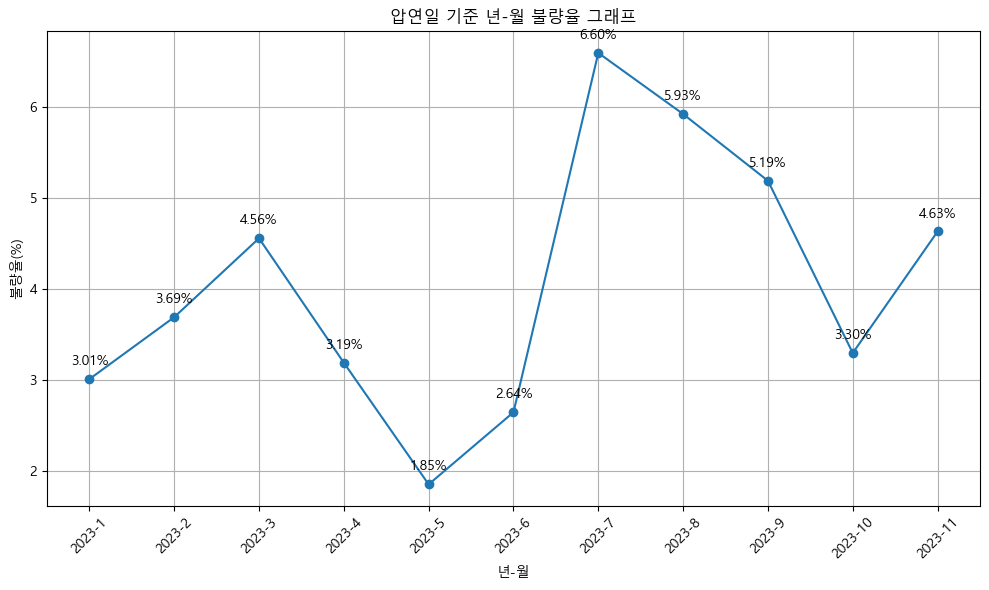

In [51]:
#불량율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(10, 6))
plt.plot(merged_df['압연년월'], merged_df['불량율'], marker='o')
plt.xlabel('년-월')
plt.ylabel('불량율(%)')
plt.title('압연일 기준 년-월 불량율 그래프')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df.iterrows():
    plt.annotate(f'{row["불량율"]:.2f}%', (row['압연년월'], row['불량율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

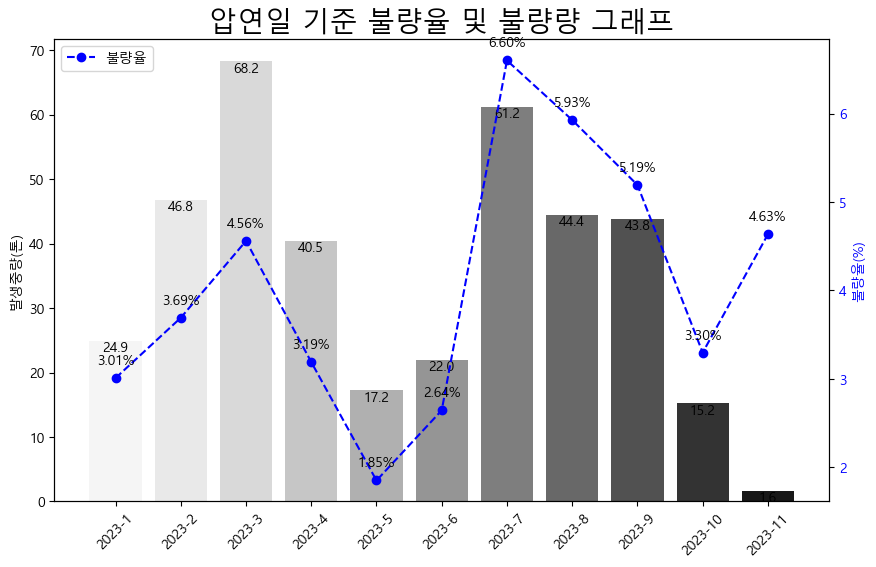

In [52]:
#불량율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df['압연년월']
y1 = merged_df['불량율']
y2 = merged_df['발생중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(10,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=45) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('발생중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='불량율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('불량율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 불량중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.1f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, -5), ha='center', va='center')

# 불량율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.2f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 불량율 및 불량량 그래프', fontsize=20)
plt.show()

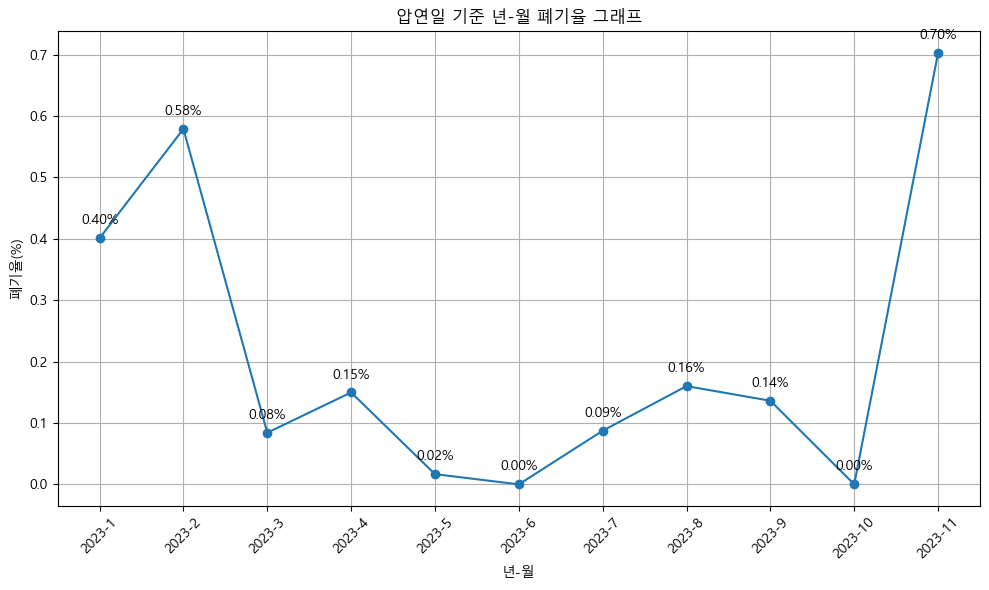

In [53]:
# 폐기율 그래프(1)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# Plot the defect rate line chart
plt.figure(figsize=(10, 6))
plt.plot(merged_df['압연년월'], merged_df['폐기율'], marker='o')
plt.xlabel('년-월')
plt.ylabel('폐기율(%)')
plt.title('압연일 기준 년-월 폐기율 그래프')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each point with the defect rate
for i, row in merged_df.iterrows():
    plt.annotate(f'{row["폐기율"]:.2f}%', (row['압연년월'], row['폐기율']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()

# Show the plot
plt.show()

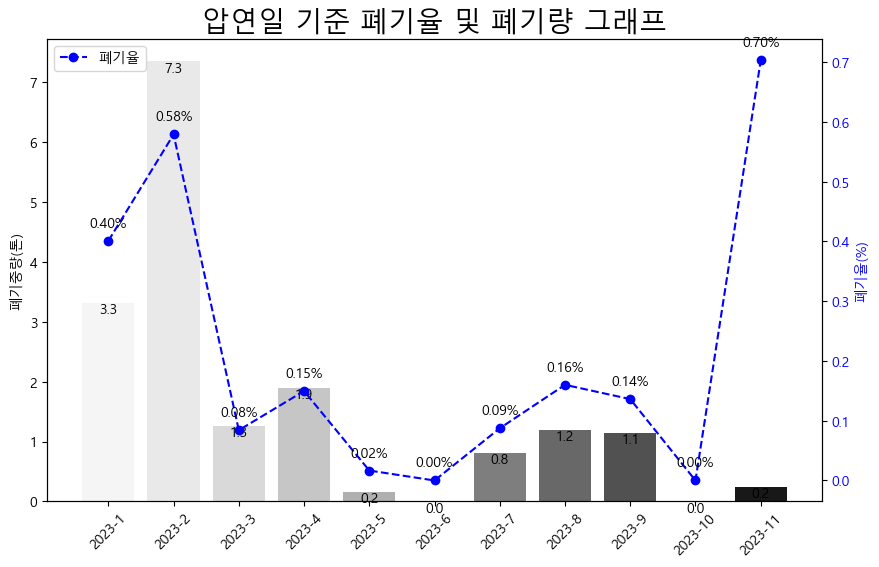

In [54]:
#폐기율 그래프(2)
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# Set font for Korean characters
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 파일 경로를 입력해주세요
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트 이름 얻어오기
rc('font', family=font_name) # 그래프에 한글 폰트 적용하기

# 1. 데이터 준비
x = merged_df['압연년월']
y1 = merged_df['폐기율']
y2 = merged_df['폐기중량']


# 2. 기본 스타일 및 그래프 그리기
fig = plt.figure(figsize=(10,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('Greys', len(x)) ## 바 차트 색상
 
xtick_label_position = list(range(len(x))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(x, rotation=45) ## x축 눈금 라벨
ax1.bar(xtick_label_position, y2, color=colors) ## 바차트 출력
ax1.set_ylabel('폐기중량(톤)')  # ax1에 y축 라벨 추가
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, y1, color=color, linestyle='--', marker='o', label ='폐기율') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정
ax2.set_ylabel('폐기율(%)', color=color)

# Combine legends for both axes
lines, labels = ax2.get_legend_handles_labels()
bars = ax1.patches
plots = lines + [bars[0]]  # Adding the first bar patch to the legend for clarity
ax1.legend(plots, labels, loc='upper left')

# 폐기중량 값을 바 위에 표시
for i, val in enumerate(y2):
    ax1.annotate(f'{val:.1f}', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, -5), ha='center', va='center')

# 폐기율 값을 선 위에 표시
for i, val in enumerate(y1):
    ax2.annotate(f'{val:.2f}%', (xtick_label_position[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.title('압연일 기준 폐기율 및 폐기량 그래프', fontsize=20)
plt.show()